In [1]:
import pandas as pd

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
advertising=pd.read_csv("Advertising.csv")

In [4]:
df=advertising.copy()

In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df=df.dropna()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 9.4 KB


In [9]:
y = df["sales"]

In [10]:
X = df.drop(["Unnamed: 0"], axis=1).astype('float64')

In [11]:
X = df.drop(["Unnamed: 0"], axis=1).astype('float64')

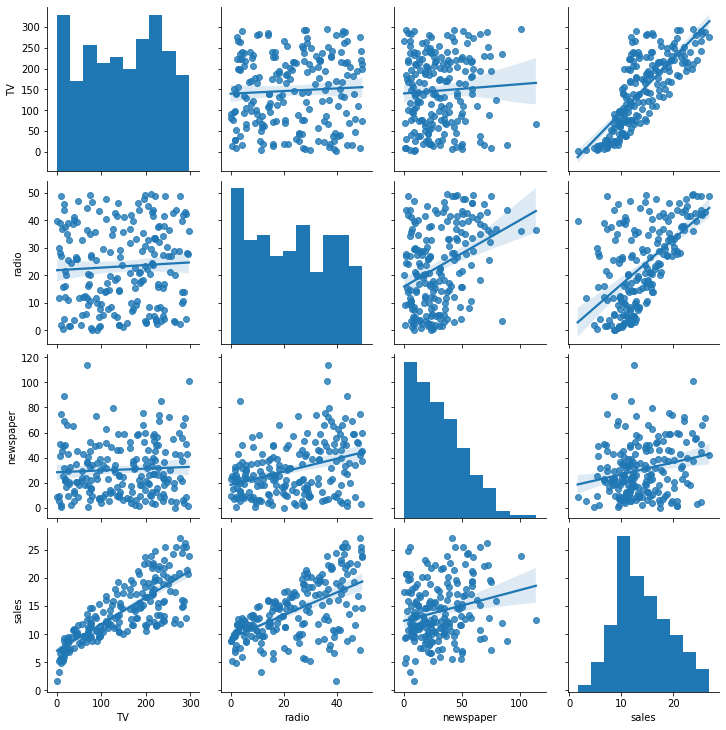

In [12]:
sns.pairplot(X,kind="reg")

In [13]:
X = df.drop(["sales"], axis=1).astype('float64')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=42)

In [15]:
X_train = pd.DataFrame(X_train["TV"])
X_test = pd.DataFrame(X_test["TV"])

In [16]:
from sklearn.svm import SVR 

In [17]:
svr_model=SVR("linear").fit(X_train,y_train)

In [18]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
svr_model.predict(X_train)[0:1]

array([17.9967905])

In [20]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = 6.518360373959749 + 0.050014946065346066 x


In [21]:
X_train["TV"][0:5]

124    229.5
16      67.8
148     38.0
93     250.9
65      69.0
Name: TV, dtype: float64

In [22]:
6.518360373959749 + 0.050014946065346066*229.5

17.99679049595667

In [23]:
y_pred=svr_model.predict(X_train)

In [24]:
import matplotlib.pyplot as plt

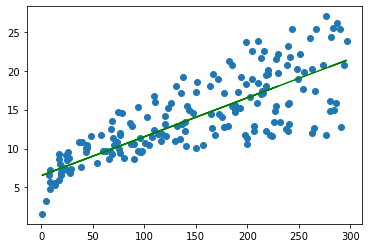

In [25]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "g");

In [26]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = 7.1173571255681685 + 0.046986388492851465 x


In [27]:
lm_model.predict(X_train)[0:5]

array([17.90073328, 10.30303427,  8.90283989, 18.906242  , 10.35941793])

In [28]:
7.1173571255681685 + 0.046986388492851465*229.5

17.900733284677578

Text(0, 0.5, 'sales')

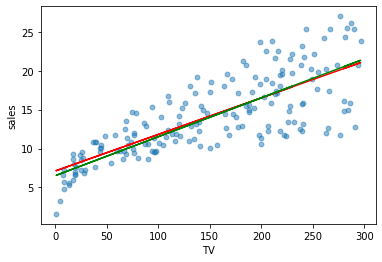

In [29]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'r')
plt.plot(X_train, y_pred, color='g')

plt.xlabel("TV")
plt.ylabel("sales")

In [30]:
y_pred = svr_model.predict(X_test)

In [31]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.399161750152776

In [32]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [33]:
svr_params={"C":np.arange(0.1,1,0.1)}

In [34]:
svr_cv_model=GridSearchCV(svr_model,svr_params,cv=10).fit(X_train,y_train)

In [35]:
pd.Series(svr_cv_model.best_params_)[0]

0.6

In [36]:
svr_tuned=SVR("linear",
                  pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

In [37]:
y_pred = svr_tuned.predict(X_test)

In [38]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.399161750152776

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=42)

In [40]:
svr_cv_model_tum=GridSearchCV(svr_model,svr_params,cv=5).fit(X_train,y_train)

In [41]:
pd.Series(svr_cv_model_tum.best_params_)[0]

0.9

In [42]:
svr_tuned_tum=SVR("linear",
                  pd.Series(svr_cv_model_tum.best_params_)[0]).fit(X_train,y_train)

In [43]:
y_pred_tum = svr_tuned_tum.predict(X_test)

In [44]:
np.sqrt(mean_squared_error(y_test, y_pred_tum))

1.851677459838145

In [ ]:
# Tv dışındaki diğer değiskenlerinde modelin anlamlılığı üzerindeki etkisi 